Yichuan Philip Ma

CS506 Project

BPDA Brazilian Census Team 2

Visualizations for Brazilians in Massachusetts by Year of Entry, compared to the entire Brazilian immigrant population in the US as a whole

In [42]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/Brazilian Population and Small Business Owners.csv")

In [3]:
year_of_entry = df[28:30]
year_of_entry_mass = year_of_entry['MASSACHUSETTS']

The following pie chart shows how much of the Brazilian population in Massachusetts entered the US in the 21st century as of 2019:

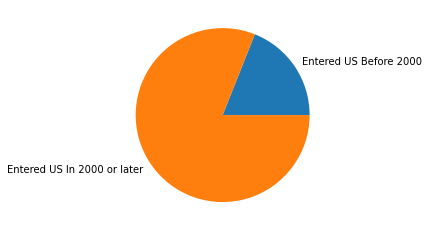

In [4]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Entered US Before 2000', 'Entered US In 2000 or later']
yoe_MA = np.array(year_of_entry_mass)

plt.pie(yoe_MA, labels=labels)
plt.savefig('BR_YOE_Mass_2019.png')
plt.show()

In [5]:
yoe_national = year_of_entry.T.iloc[2:]
yoe_national = yoe_national.dropna()

The following pie chart shows how much of the Brazilian population across the US entered in the 21st century as of 2019:

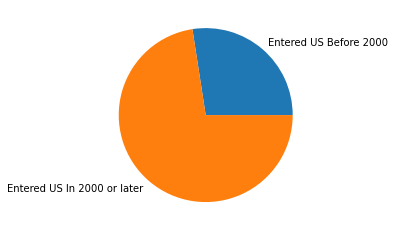

In [7]:
yoe_national = np.array([sum(yoe_national.iloc[:,0]), sum(yoe_national.iloc[:,1])])
plt.pie(yoe_national, labels=labels)
plt.savefig('BR_YOE_National_2019.png')
plt.show()

According to these pie charts, the Brazilian population in Massachusetts has a larger share arriving in the US in the 21st century than the nationwide average as of 2019.

### Data Extraction and Visualizations for Years 2012-2019

In [9]:
df2012 = pd.read_csv('../../data/Brazilian Immigrants/2012-Table 1.csv')
df2012

,Unnamed: 0,State Code,1,2,4,5,6,8,9,10,...,46,47,48,49,50,51,53,54,55,56
0,Population,Population,130,63,3036,124,36548,2668,14894,343,...,230,506,13092,3613,295,4320,3189,217,782,99
1,Age,Age 0 to 4,0,0,0,0,245,0,0,0,...,0,0,100,0,0,0,0,0,0,0
2,Age,Age 05 to 09,0,0,145,0,276,0,0,0,...,0,0,659,0,0,0,0,0,0,0
3,Age,Age 10 to 19,130,0,186,0,1379,0,322,0,...,23,0,640,298,60,606,0,0,267,0
4,Age,Age 20 to 24,0,0,389,0,1542,0,405,14,...,0,41,325,614,38,0,409,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Poverty Status,Individuals Below Poverty,0,0,268,124,3290,0,1547,0,...,23,41,927,817,0,378,330,0,0,0
67,Poverty Status,Individuals Above Poverty,130,63,2768,0,33002,2668,13212,329,...,207,465,12051,2796,182,3666,2780,217,782,99
68,Poverty Status,Not Determined,0,0,0,0,256,0,135,14,...,0,0,114,0,113,276,79,0,0,0
69,Median Personal Earnings,Median Personal Earnings,-19999,150880,20000,11000,24000,18000,22900,28000,...,35000,60000,17000,20000,67000,27800,50000,70000,450,50000


MA state code is 25.

Year of Entry data are in rows 27-28 for each year.

In [14]:
yoe2012 = df2012[27:29]
yoe2012

,Unnamed: 0,State Code,1,2,4,5,6,8,9,10,...,46,47,48,49,50,51,53,54,55,56
27,Year of Entry,Entered US before 2000,0,63,921,0,18318,1255,7671,329,...,207,268,5940,1688,197,2016,1263,54,210,99
28,Year of Entry,Entered US in 2000 or later,130,0,2115,124,18230,1413,7223,14,...,23,238,7152,1925,98,2304,1926,163,572,0


In [16]:
yoe2012['25']

27    22922
28    32187
Name: 25, dtype: int64

In [62]:
dfs = []
for year in range(2012, 2019+1):
    dfYear = pd.read_excel('../../data/Brazilian Immigrants.xlsx', sheet_name=str(year))
    subDf = dfYear[27:28+1]
    subDf = subDf.rename(columns={'Unnamed: 0': 'Type', 'State_Code': 'Type', 'State_Code.1': 'State Code'},
                         errors='ignore')
    cols = subDf.columns.tolist()
    cols.insert(0, 'Year')
    subDf = subDf.reindex(columns=cols)
    years = [year] * (28+1 - 27)
    subDf['Year'] = years
    dfs.append(subDf)
newDf = pd.concat(dfs)
newDf.drop(columns=['Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52'], inplace=True)
newDf.fillna(0, inplace=True)
newDf.to_csv("Year Of Entry 2012-2019.csv")

In [64]:
newDf

,Year,Type,State Code,1,2,4,5,6,8,9,...,47,48,49,50,51,53,54,55,56,30
27,2012,Year of Entry,Entered US before 2000,0.0,63.0,921.0,0.0,18318.0,1255.0,7671.0,...,268.0,5940.0,1688.0,197.0,2016.0,1263.0,54.0,210.0,99.0,0.0
28,2012,Year of Entry,Entered US in 2000 or later,130.0,0.0,2115.0,124.0,18230.0,1413.0,7223.0,...,238.0,7152.0,1925.0,98.0,2304.0,1926.0,163.0,572.0,0.0,0.0
27,2013,Year of Entry,Entered US before 2000,137.0,68.0,973.0,120.0,15875.0,450.0,7624.0,...,444.0,7698.0,1262.0,52.0,2571.0,1391.0,179.0,195.0,20.0,194.0
28,2013,Year of Entry,Entered US in 2000 or later,635.0,486.0,912.0,214.0,19789.0,2084.0,7506.0,...,404.0,7074.0,2566.0,257.0,2228.0,4497.0,80.0,944.0,0.0,422.0
27,2014,Year of Entry,Entered US before 2000,275.0,59.0,1145.0,162.0,15626.0,504.0,6840.0,...,631.0,5206.0,783.0,0.0,2023.0,713.0,187.0,60.0,76.0,0.0
28,2014,Year of Entry,Entered US in 2000 or later,666.0,64.0,1930.0,482.0,16971.0,1613.0,6945.0,...,1888.0,9429.0,1779.0,0.0,2023.0,1381.0,156.0,1158.0,22.0,0.0
27,2015,Year of Entry,Entered US before 2000,238.0,44.0,679.0,95.0,14897.0,1247.0,6017.0,...,0.0,5083.0,1841.0,74.0,3247.0,591.0,83.0,187.0,0.0,0.0
28,2015,Year of Entry,Entered US in 2000 or later,283.0,0.0,546.0,0.0,20691.0,1564.0,9580.0,...,434.0,14289.0,1229.0,0.0,4123.0,3350.0,130.0,1002.0,0.0,0.0
27,2016,Year of Entry,Entered US before 2000,0.0,147.0,705.0,0.0,18431.0,929.0,9702.0,...,761.0,5109.0,1234.0,0.0,2654.0,945.0,259.0,465.0,36.0,16.0
28,2016,Year of Entry,Entered US in 2000 or later,308.0,0.0,2188.0,441.0,27875.0,1330.0,12157.0,...,562.0,12667.0,3573.0,59.0,3540.0,2494.0,255.0,920.0,75.0,53.0


In [45]:
df2012 = pd.read_excel('../../data/Brazilian Immigrants.xlsx', sheet_name='2012')
df2012.fillna(0, inplace=True)
df2012

,Unnamed: 0,State Code,1,2,4,5,6,8,9,10,...,46,47,48,49,50,51,53,54,55,56
0,Population,Population,130,63,3036,124,36548,2668,14894,343,...,230,506,13092,3613,295,4320,3189,217,782,99
1,Age,Age 0 to 4,0,0,0,0,245,0,0,0,...,0,0,100,0,0,0,0,0,0,0
2,Age,Age 05 to 09,0,0,145,0,276,0,0,0,...,0,0,659,0,0,0,0,0,0,0
3,Age,Age 10 to 19,130,0,186,0,1379,0,322,0,...,23,0,640,298,60,606,0,0,267,0
4,Age,Age 20 to 24,0,0,389,0,1542,0,405,14,...,0,41,325,614,38,0,409,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Poverty Status,Individuals Below Poverty,0,0,268,124,3290,0,1547,0,...,23,41,927,817,0,378,330,0,0,0
67,Poverty Status,Individuals Above Poverty,130,63,2768,0,33002,2668,13212,329,...,207,465,12051,2796,182,3666,2780,217,782,99
68,Poverty Status,Not Determined,0,0,0,0,256,0,135,14,...,0,0,114,0,113,276,79,0,0,0
69,Median Personal Earnings,Median Personal Earnings,-19999,150880,20000,11000,24000,18000,22900,28000,...,35000,60000,17000,20000,67000,27800,50000,70000,450,50000


In [71]:
! cd ..;ls

Population-2019.csv   Population-2019.png   __init__.py
Population-2019.ipynb YearOfEntry           extract_data
